# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [8]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

In [10]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

 #Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [13]:
# Step 1: Set Up Parameters

# Location coordinates for London, UK
latitude = 51.5074
longitude = -0.1277

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  # One year of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation', 'wind_speed_10m', 'pressure_msl']


In [15]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)



In [16]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [17]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl
0,2022-01-01T00:00,12.7,93,0.0,17.6,1020.7
1,2022-01-01T01:00,12.8,93,0.0,19.0,1020.4
2,2022-01-01T02:00,12.5,93,0.0,17.9,1020.2
3,2022-01-01T03:00,12.3,92,0.0,18.6,1020.4
4,2022-01-01T04:00,11.9,93,0.0,20.3,1020.0


In [18]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
wind_speed_10m         0
pressure_msl           0
dtype: int64

In [19]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/gy/td7lhv614s93nmh2xjhqr0lm0000gn/T/ipykernel_64415/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [25]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,12.013014,76.635160,0.075696,14.306587,1016.704806
std,6.651762,16.721898,0.404506,7.517582,9.956625
min,-5.400000,17.000000,0.000000,0.000000,974.200000
25%,7.400000,65.000000,0.000000,8.600000,1010.200000
50%,11.900000,81.000000,0.000000,12.700000,1017.300000
75%,16.400000,90.000000,0.000000,18.500000,1023.400000
max,38.000000,100.000000,14.700000,68.000000,1043.400000


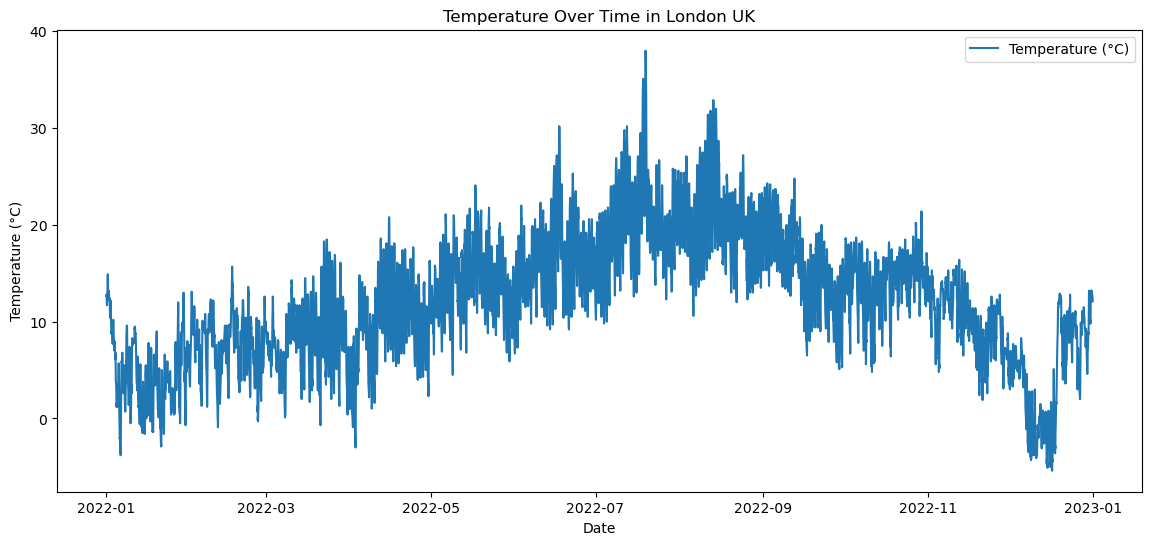

In [27]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in London UK')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

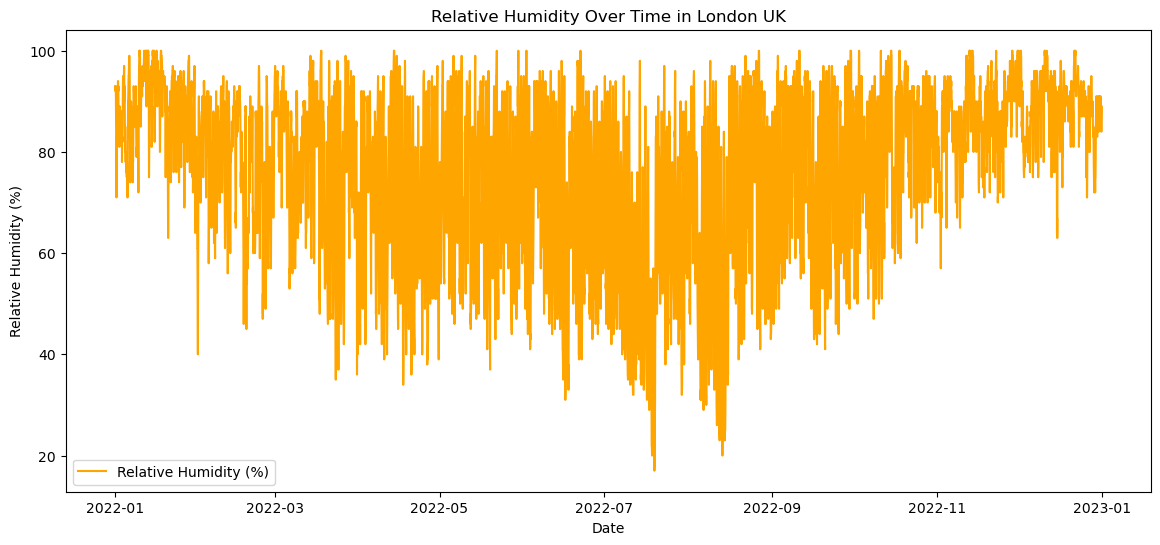

In [29]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in London UK')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


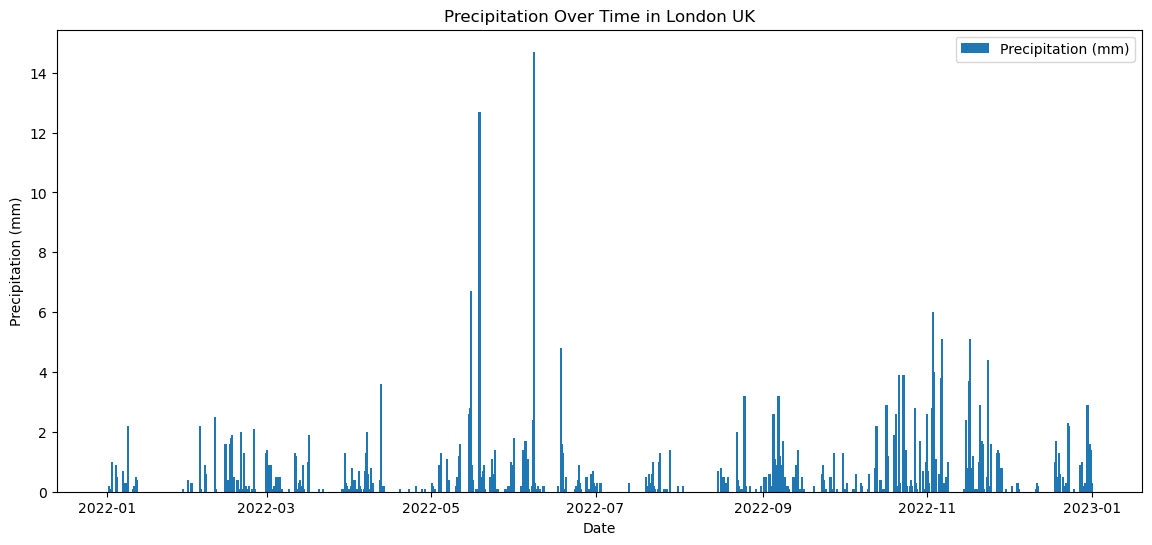

In [31]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in London UK')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [32]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: -0.66


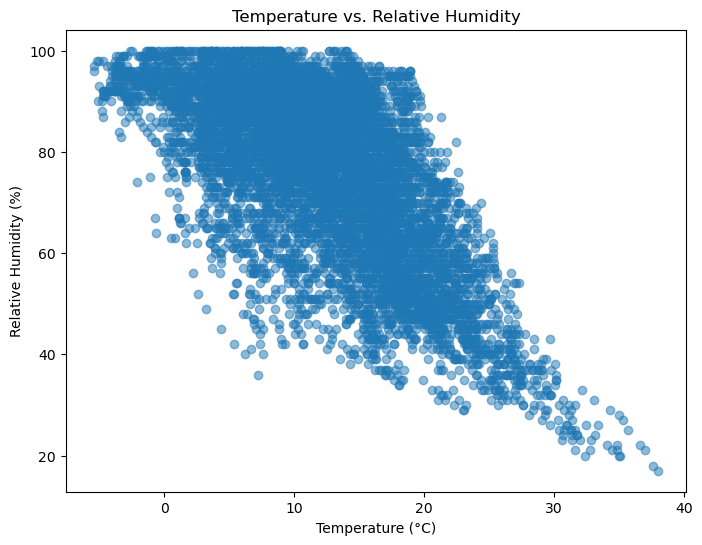

In [33]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [34]:
# Step 7: Resample Data to Daily Averages

daily_avg = df.resample('D').mean()
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl
time,,,,,
2022-01-01,13.020833,85.750000,0.008333,21.033333,1017.491667
2022-01-02,10.966667,87.166667,0.083333,23.804167,1010.370833
2022-01-03,8.650000,86.125000,0.000000,18.037500,1007.870833
2022-01-04,4.579167,88.166667,0.104167,13.012500,1001.400000
2022-01-05,2.000000,80.541667,0.000000,15.362500,1013.591667


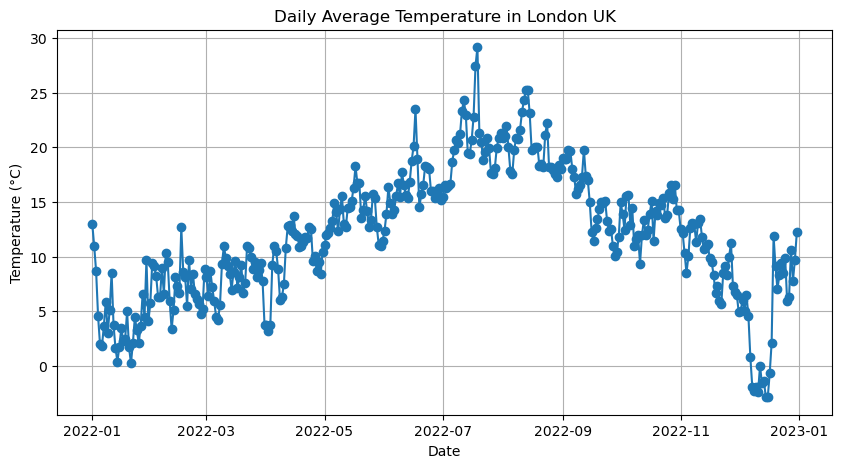

In [35]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in London UK')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [36]:
df.head()

,temperature_2m,relativehumidity_2m,precipitation,wind_speed_10m,pressure_msl
time,,,,,
2022-01-01 00:00:00,12.7,93,0.0,17.6,1020.7
2022-01-01 01:00:00,12.8,93,0.0,19.0,1020.4
2022-01-01 02:00:00,12.5,93,0.0,17.9,1020.2
2022-01-01 03:00:00,12.3,92,0.0,18.6,1020.4
2022-01-01 04:00:00,11.9,93,0.0,20.3,1020.0


In [37]:
print(df.columns)

Index(['temperature_2m', 'relativehumidity_2m', 'precipitation',
       'wind_speed_10m', 'pressure_msl'],
      dtype='object')


In [38]:
print(df.index)

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               ...
               '2022-12-31 14:00:00', '2022-12-31 15:00:00',
               '2022-12-31 16:00:00', '2022-12-31 17:00:00',
               '2022-12-31 18:00:00', '2022-12-31 19:00:00',
               '2022-12-31 20:00:00', '2022-12-31 21:00:00',
               '2022-12-31 22:00:00', '2022-12-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=8760, freq=None)


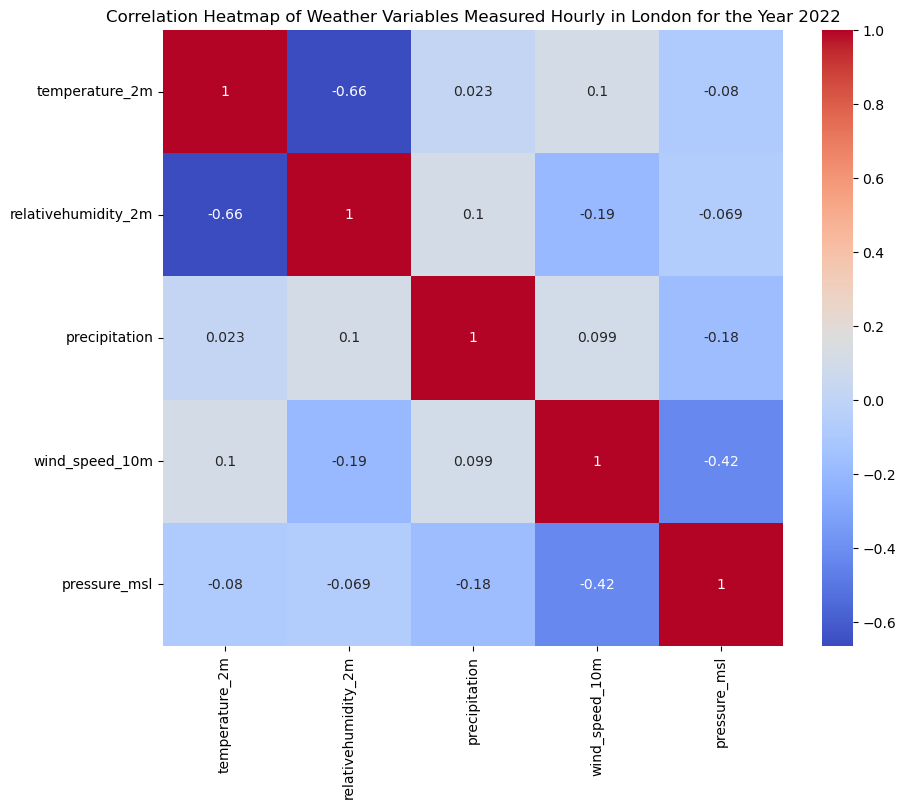

In [47]:
import seaborn as sns

# Correlation Heatmap across 5 variables
correlation_matrix = df.corr()  

plt.figure(figsize=(10, 8))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


plt.title('Correlation Heatmap of Weather Variables Measured Hourly in London for the Year 2022')
plt.show()



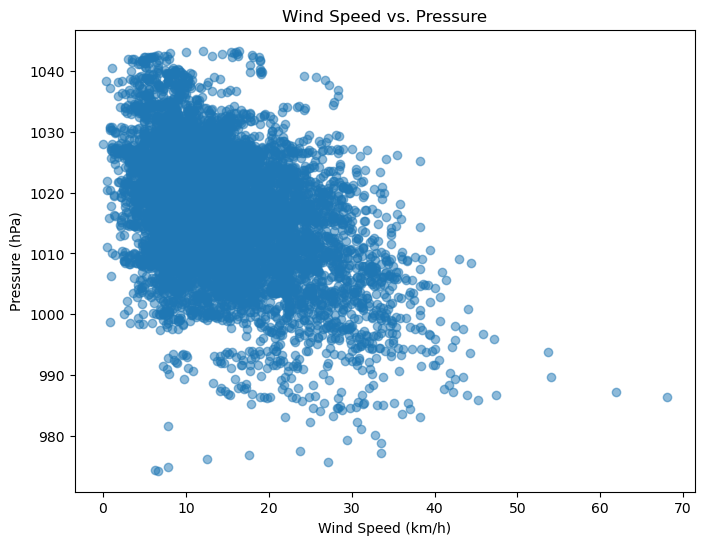

In [252]:
# Scatter Plot of Wind Speed at 10m Altitude vs. Pressure

plt.figure(figsize=(8, 6))
plt.scatter(df['wind_speed_10m'], df['pressure_msl'], alpha=0.5)
plt.title('Wind Speed vs. Pressure')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Pressure (hPa)')
plt.show()

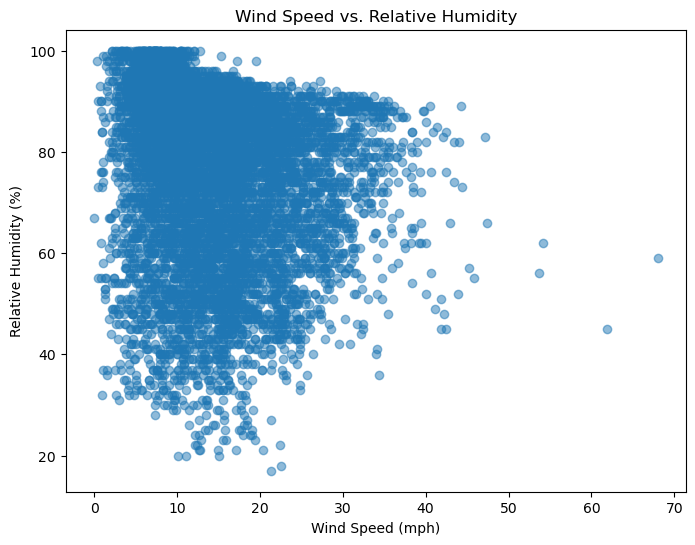

In [199]:
# Scatter Plot of Wind Speed at 10m Altitude vs. Pressure

plt.figure(figsize=(8, 6))
plt.scatter(df['wind_speed_10m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Wind Speed vs. Relative Humidity')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Relative Humidity (%)')
plt.show()

In [114]:
# Step 8: Compare with Another Location (Seattle)

# Coordinates for Seattle, WA
latitude_se = 47.6062
longitude_se = -122.3321

params_se = {
    'latitude': latitude_se,
    'longitude': longitude_se,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_se = requests.get(base_url, params=params_se)

# Load and clean Seattle Data
data_se = response_se.json()
hourly_data_se = data_se['hourly']
df_se = pd.DataFrame(hourly_data_se)

df_se['time'] = pd.to_datetime(df_se['time'])
df_se.set_index('time', inplace=True)
df_se.fillna(method='ffill', inplace=True)


/var/folders/gy/td7lhv614s93nmh2xjhqr0lm0000gn/T/ipykernel_62497/592654566.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_se.fillna(method='ffill', inplace=True)


In [116]:
# Resample Los Angeles Data to Daily Averages

daily_avg_se = df_se.resample('D').mean()


In [118]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'London UK': daily_avg['temperature_2m'],
    'Seattle': daily_avg_se['temperature_2m']
})


In [122]:
print(combined_temp.head())

            London UK   Seattle  Temp Difference
time                                            
2022-01-01  13.020833 -2.458333       -15.479167
2022-01-02  10.966667  1.425000        -9.541667
2022-01-03   8.650000  2.220833        -6.429167
2022-01-04   4.579167  3.312500        -1.266667
2022-01-05   2.000000  2.441667         0.441667


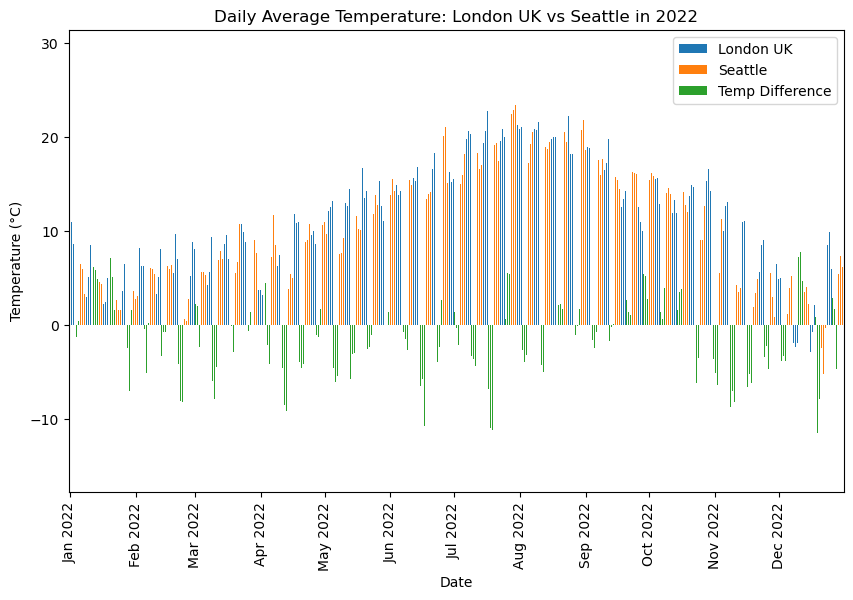

In [152]:
# Plot Comparison of Daily Average Temperature
import matplotlib.dates as mdates


combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: London UK vs Seattle in 2022')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
ax = plt.gca()
#Set x-axis to monthly 
ax.xaxis.set_major_locator(mdates.MonthLocator())
# Monthly label 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b' + ' 2022'))
plt.xticks(rotation=90)
plt.grid(False)
plt.show()




In [120]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Seattle'] - combined_temp['London UK']
combined_temp


,London UK,Seattle,Temp Difference
time,,,
2022-01-01,13.020833,-2.458333,-15.479167
2022-01-02,10.966667,1.425000,-9.541667
2022-01-03,8.650000,2.220833,-6.429167
2022-01-04,4.579167,3.312500,-1.266667
2022-01-05,2.000000,2.441667,0.441667
...,...,...,...
2022-12-27,6.295833,8.012500,1.716667
2022-12-28,10.604167,5.987500,-4.616667
2022-12-29,7.791667,5.470833,-2.320833


In [154]:
# Step 10: Save Data to CSV (Optional)

# Save London
df.to_csv('London_weather.csv')

# Save Seattle data
df_la.to_csv('Seattle_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!
